In [1]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [2]:
dataset_path = '/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

stop
up
learn
bird
follow
_background_noise_
wow
on
marvin
tree
no
dog
happy
off
down
six
sheila
bed
seven
visual
four
right
.ipynb_checkpoints
five
cat
house
left
go
eight
forward
one
yes
two
backward
nine
three
zero


In [4]:
# removing background noise and checkpoints labels
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
all_targets.remove('.ipynb_checkpoints')
print(all_targets)

['stop', 'up', 'learn', 'bird', 'follow', 'wow', 'on', 'marvin', 'tree', 'no', 'dog', 'happy', 'off', 'down', 'six', 'sheila', 'bed', 'seven', 'visual', 'four', 'right', 'five', 'cat', 'house', 'left', 'go', 'eight', 'forward', 'one', 'yes', 'two', 'backward', 'nine', 'three', 'zero']


In [5]:
# number of samples for every label
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

3872
3723
1575
2064
1579
2123
3845
2100
1759
3941
2128
2054
3745
3917
3860
2022
2014
3998
1592
3728
3778
4052
2031
2113
3801
3880
3787
1557
3890
4044
3880
1664
3934
3727
4052
Total samples: 105829


In [7]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [13]:
#filenames of every dataset
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/stop
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/up
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/learn
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/bird
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/follow
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/wow
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/on
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/marvin
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/tree
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/no
/home/pmedur/strojnoUcenje/env/bin/TorchAudio/SpeechCommands/speech_commands_v0.02/dog
/home/pmedur/strojnoUcenje/env/bin/

In [14]:
# Flattening filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [15]:
# Associating filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [16]:
# Calculating validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [13]:
# Breaking dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [14]:
# Breaking output apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [15]:
# Creating MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

Dropped: 2 (16, 15)
Dropped: 7 (16, 5)
Dropped: 9 (16, 11)
Dropped: 12 (16, 9)
Dropped: 33 (16, 13)
Dropped: 38 (16, 11)
Dropped: 44 (16, 14)
Dropped: 114 (16, 12)
Dropped: 120 (16, 11)
Dropped: 122 (16, 9)
Dropped: 133 (16, 15)
Dropped: 145 (16, 8)
Dropped: 147 (16, 13)
Dropped: 162 (16, 11)
Dropped: 164 (16, 15)
Dropped: 176 (16, 6)
Dropped: 195 (16, 13)
Dropped: 204 (16, 15)
Dropped: 207 (16, 12)
Dropped: 209 (16, 7)
Dropped: 217 (16, 8)
Dropped: 235 (16, 15)
Dropped: 242 (16, 10)
Dropped: 257 (16, 13)
Dropped: 262 (16, 7)
Dropped: 264 (16, 7)
Dropped: 267 (16, 9)
Dropped: 275 (16, 14)
Dropped: 276 (16, 14)
Dropped: 280 (16, 13)
Dropped: 285 (16, 12)
Dropped: 289 (16, 11)
Dropped: 293 (16, 12)
Dropped: 296 (16, 13)
Dropped: 304 (16, 15)
Dropped: 306 (16, 11)
Dropped: 336 (16, 8)
Dropped: 341 (16, 13)
Dropped: 357 (16, 7)
Dropped: 370 (16, 12)
Dropped: 376 (16, 9)
Dropped: 388 (16, 13)
Dropped: 392 (16, 12)
Dropped: 405 (16, 7)
Dropped: 407 (16, 13)
Dropped: 426 (16, 13)
Dropped: 433

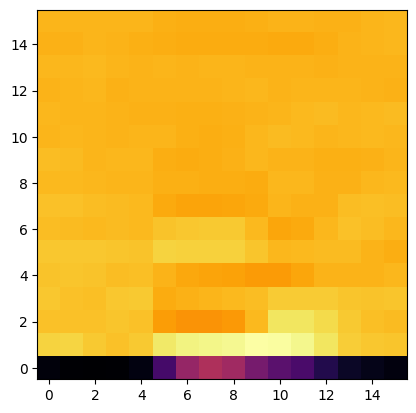

In [16]:
# testing set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

In [17]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.104


playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


MFCCs: [[-6.80355479e+01 -6.25117245e+01 -4.41944753e+01 -2.60263710e+01
  -1.73094621e+01 -1.58552545e+01 -2.03808968e+01 -3.06612321e+01
  -4.29895778e+01]
 [ 8.99167191e+00  8.26607536e+00  2.40864579e+00  1.30614912e+00
   7.26602735e-01  7.25842009e-01  1.62982780e+00  3.42571648e+00
   2.92233476e+00]
 [ 2.20407418e+00  6.89049544e+00  1.42059639e+01  9.53212457e+00
   5.57568582e+00  3.09311269e+00  1.26740416e+00  6.09715345e-01
   3.85552924e+00]
 [ 3.10609742e+00  2.64933356e+00  7.20103900e-01 -1.83864594e+00
  -2.80658972e+00 -2.95792221e+00 -2.45154410e+00 -1.93053814e+00
  -2.56009420e+00]
 [ 2.39141626e+00  1.84134400e+00 -2.81100167e+00 -5.45866676e+00
  -6.11027581e+00 -5.94920961e+00 -5.07408441e+00 -3.17522091e+00
  -4.65407341e-01]
 [ 3.77987443e-01 -5.80247533e-01 -2.60982889e+00 -2.41015838e+00
  -2.06050620e+00 -1.59959726e+00 -1.06996009e+00 -9.39635659e-01
  -1.45112962e+00]
 [ 8.98034096e-01 -1.14512516e+00 -1.60496886e+00 -4.16834250e-01
   5.55138682e-01  1.

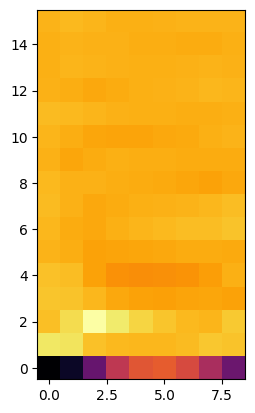

In [18]:
# testing MFCC
from playsound import playsound

idx = 267

path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

print(target_list[int(y_orig_train[idx])])
playsound(path)

In [19]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        if not path.endswith('.wav'):
            continue

        mfccs = calc_mfcc(path)

        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [20]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 2 (16, 15)
Dropped: 7 (16, 5)
Dropped: 9 (16, 11)
Dropped: 12 (16, 9)
Dropped: 33 (16, 13)
Dropped: 38 (16, 11)
Dropped: 44 (16, 14)
Dropped: 114 (16, 12)
Dropped: 120 (16, 11)
Dropped: 122 (16, 9)
Dropped: 133 (16, 15)
Dropped: 145 (16, 8)
Dropped: 147 (16, 13)
Dropped: 162 (16, 11)
Dropped: 164 (16, 15)
Dropped: 176 (16, 6)
Dropped: 195 (16, 13)
Dropped: 204 (16, 15)
Dropped: 207 (16, 12)
Dropped: 209 (16, 7)
Dropped: 217 (16, 8)
Dropped: 235 (16, 15)
Dropped: 242 (16, 10)
Dropped: 257 (16, 13)
Dropped: 262 (16, 7)
Dropped: 264 (16, 7)
Dropped: 267 (16, 9)
Dropped: 275 (16, 14)
Dropped: 276 (16, 14)
Dropped: 280 (16, 13)
Dropped: 285 (16, 12)
Dropped: 289 (16, 11)
Dropped: 293 (16, 12)
Dropped: 296 (16, 13)
Dropped: 304 (16, 15)
Dropped: 306 (16, 11)
Dropped: 336 (16, 8)
Dropped: 341 (16, 13)
Dropped: 357 (16, 7)
Dropped: 370 (16, 12)
Dropped: 376 (16, 9)
Dropped: 388 (16, 13)
Dropped: 392 (16, 12)
Dropped: 405 (16, 7)
Dropped: 407 (16, 13)
Dropped: 426 (16, 13)
Dropped: 433

In [21]:
# Save features 
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [22]:
# loading features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']